In [132]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from itertools import combinations

import networkx as nx

import random

In [53]:
df = pd.read_json('/Users/trevor/Desktop/Research/climate-trends/climate_articles_unique_english.json')

In [54]:
df.shape

(224958, 56)

In [4]:
df.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'license',
       'content-domain', 'short-container-title', 'published-print', 'DOI',
       'type', 'created', 'page', 'source', 'is-referenced-by-count', 'title',
       'prefix', 'volume', 'author', 'member', 'published-online', 'reference',
       'container-title', 'language', 'link', 'deposited', 'score', 'resource',
       'issued', 'references-count', 'journal-issue', 'alternative-id', 'URL',
       'ISSN', 'issn-type', 'published', 'abstract', 'original-title',
       'archive', 'update-policy', 'assertion', 'relation', 'subtitle',
       'published-other', 'special_numbering', 'update-to', 'editor', 'funder',
       'issue-title', 'article-number', 'updated-by', 'accepted',
       'earliest_pub_year', 'cleaned_abstract', 'chair', 'translator',
       'clinical-trial-number'],
      dtype='object')

In [5]:
df['author'][1]
# list of dictionaries

[{'given': 'Nathan P.',
  'family': 'Gillett',
  'sequence': 'first',
  'affiliation': [{'name': 'Canadian Centre for Climate Modelling and Analysis, Environment Canada, Victoria, British Columbia, Canada'}]},
 {'given': 'Vivek K.',
  'family': 'Arora',
  'sequence': 'first',
  'affiliation': [{'name': 'Canadian Centre for Climate Modelling and Analysis, Environment Canada, Victoria, British Columbia, Canada'}]},
 {'given': 'Damon',
  'family': 'Matthews',
  'sequence': 'additional',
  'affiliation': [{'name': 'Department of Geography, Planning and Environment, Concordia University, Montreal, Quebec, Canada'}]},
 {'given': 'Myles R.',
  'family': 'Allen',
  'sequence': 'additional',
  'affiliation': [{'name': 'School of Geography and the Environment, University of Oxford, Oxford, United Kingdom'}]}]

In [84]:
df['author'][1][1].get('affiliation')[0]

{'name': 'Canadian Centre for Climate Modelling and Analysis, Environment Canada, Victoria, British Columbia, Canada'}

In [60]:
states = [
    {"code": "US", "name": "United States"},
    {"code": "USA", "name": "United States of America"},
    {"code": "AL", "name": "Alabama"},
    {"code": "AK", "name": "Alaska"},
    {"code": "AZ", "name": "Arizona"},
    {"code": "AR", "name": "Arkansas"},
    {"code": "CA", "name": "California"},
    {"code": "CO", "name": "Colorado"},
    {"code": "CT", "name": "Connecticut"},
    {"code": "DE", "name": "Delaware"},
    {"code": "FL", "name": "Florida"},
    {"code": "GA", "name": "Georgia"},
    {"code": "HI", "name": "Hawaii"},
    {"code": "ID", "name": "Idaho"},
    {"code": "IL", "name": "Illinois"},
    {"code": "IN", "name": "Indiana"},
    {"code": "IA", "name": "Iowa"},
    {"code": "KS", "name": "Kansas"},
    {"code": "KY", "name": "Kentucky"},
    {"code": "LA", "name": "Louisiana"},
    {"code": "ME", "name": "Maine"},
    {"code": "MD", "name": "Maryland"},
    {"code": "MA", "name": "Massachusetts"},
    {"code": "MI", "name": "Michigan"},
    {"code": "MN", "name": "Minnesota"},
    {"code": "MS", "name": "Mississippi"},
    {"code": "MO", "name": "Missouri"},
    {"code": "MT", "name": "Montana"},
    {"code": "NE", "name": "Nebraska"},
    {"code": "NV", "name": "Nevada"},
    {"code": "NH", "name": "New Hampshire"},
    {"code": "NJ", "name": "New Jersey"},
    {"code": "NM", "name": "New Mexico"},
    {"code": "NY", "name": "New York"},
    {"code": "NC", "name": "North Carolina"},
    {"code": "ND", "name": "North Dakota"},
    {"code": "OH", "name": "Ohio"},
    {"code": "OK", "name": "Oklahoma"},
    {"code": "OR", "name": "Oregon"},
    {"code": "PA", "name": "Pennsylvania"},
    {"code": "RI", "name": "Rhode Island"},
    {"code": "SC", "name": "South Carolina"},
    {"code": "SD", "name": "South Dakota"},
    {"code": "TN", "name": "Tennessee"},
    {"code": "TX", "name": "Texas"},
    {"code": "UT", "name": "Utah"},
    {"code": "VT", "name": "Vermont"},
    {"code": "VA", "name": "Virginia"},
    {"code": "WA", "name": "Washington"},
    {"code": "WV", "name": "West Virginia"},
    {"code": "WI", "name": "Wisconsin"},
    {"code": "WY", "name": "Wyoming"},
    {"code": "PR", "name": "Puerto Rico"}
]

state_names = {state["name"] for state in states}
state_codes = {state["code"] for state in states}


In [62]:
countries_mapping = {
    "afghanistan": "Afghanistan",
    "albania": "Albania",
    "algeria": "Algeria",
    "andorra": "Andorra",
    "angola": "Angola",
    "antigua and barbuda": "Antigua And Barbuda",
    "argentina": "Argentina",
    "armenia": "Armenia",
    "australia": "Australia",
    "austria": "Austria",
    "azerbaijan": "Azerbaijan",
    "bahamas": "Bahamas",
    "bahrain": "Bahrain",
    "bangladesh": "Bangladesh",
    "barbados": "Barbados",
    "belarus": "Belarus",
    "belgium": "Belgium",
    "belize": "Belize",
    "benin": "Benin",
    "bhutan": "Bhutan",
    "bolivia": "Bolivia",
    "bosnia and herzegovina": "Bosnia And Herzegovina",
    "botswana": "Botswana",
    "brazil": "Brazil",
    "brunei": "Brunei",
    "bulgaria": "Bulgaria",
    "burkina faso": "Burkina Faso",
    "burundi": "Burundi",
    "cabo verde": "Cabo Verde",
    "cambodia": "Cambodia",
    "cameroon": "Cameroon",
    "canada": "Canada",
    "central african republic": "Central African Republic",
    "chad": "Chad",
    "chile": "Chile",
    "china": "China",
    "colombia": "Colombia",
    "comoros": "Comoros",
    "congo": "Congo",
    "costa rica": "Costa Rica",
    "croatia": "Croatia",
    "cuba": "Cuba",
    "cyprus": "Cyprus",
    "czech republic": "Czech Republic",
    "denmark": "Denmark",
    "djibouti": "Djibouti",
    "dominica": "Dominica",
    "dominican republic": "Dominican Republic",
    "ecuador": "Ecuador",
    "egypt": "Egypt",
    "el salvador": "El Salvador",
    "equatorial guinea": "Equatorial Guinea",
    "eritrea": "Eritrea",
    "estonia": "Estonia",
    "eswatini": "Eswatini",
    "ethiopia": "Ethiopia",
    "fiji": "Fiji",
    "finland": "Finland",
    "france": "France",
    "gabon": "Gabon",
    "gambia": "Gambia",
    "georgia": "Georgia",
    "germany": "Germany",
    "ghana": "Ghana",
    "greece": "Greece",
    "grenada": "Grenada",
    "guatemala": "Guatemala",
    "guinea": "Guinea",
    "guinea-bissau": "Guinea-Bissau",
    "guyana": "Guyana",
    "haiti": "Haiti",
    "honduras": "Honduras",
    "hungary": "Hungary",
    "iceland": "Iceland",
    "india": "India",
    "indonesia": "Indonesia",
    "iran": "Iran",
    "iraq": "Iraq",
    "ireland": "Ireland",
    "israel": "Israel",
    "italy": "Italy",
    "jamaica": "Jamaica",
    "japan": "Japan",
    "jordan": "Jordan",
    "kazakhstan": "Kazakhstan",
    "kenya": "Kenya",
    "kiribati": "Kiribati",
    "kosovo": "Kosovo",
    "kuwait": "Kuwait",
    "kyrgyzstan": "Kyrgyzstan",
    "laos": "Laos",
    "latvia": "Latvia",
    "lebanon": "Lebanon",
    "lesotho": "Lesotho",
    "liberia": "Liberia",
    "libya": "Libya",
    "liechtenstein": "Liechtenstein",
    "lithuania": "Lithuania",
    "luxembourg": "Luxembourg",
    "madagascar": "Madagascar",
    "malawi": "Malawi",
    "malaysia": "Malaysia",
    "maldives": "Maldives",
    "mali": "Mali",
    "malta": "Malta",
    "marshall islands": "Marshall Islands",
    "mauritania": "Mauritania",
    "mauritius": "Mauritius",
    "mexico": "Mexico",
    "micronesia": "Micronesia",
    "moldova": "Moldova",
    "monaco": "Monaco",
    "mongolia": "Mongolia",
    "montenegro": "Montenegro",
    "morocco": "Morocco",
    "mozambique": "Mozambique",
    "myanmar": "Myanmar",
    "namibia": "Namibia",
    "nauru": "Nauru",
    "nepal": "Nepal",
    "netherlands": "Netherlands",
    "new zealand": "New Zealand",
    "nicaragua": "Nicaragua",
    "niger": "Niger",
    "nigeria": "Nigeria",
    "north korea": "North Korea",
    "north macedonia": "North Macedonia",
    "norway": "Norway",
    "oman": "Oman",
    "pakistan": "Pakistan",
    "palau": "Palau",
    "palestine": "Palestine",
    "panama": "Panama",
    "papua new guinea": "Papua New Guinea",
    "paraguay": "Paraguay",
    "peru": "Peru",
    "philippines": "Philippines",
    "poland": "Poland",
    "portugal": "Portugal",
    "qatar": "Qatar",
    "romania": "Romania",
    "russia": "Russia",
    "rwanda": "Rwanda",
    "saint kitts and nevis": "Saint Kitts And Nevis",
    "KN N": "Saint Kitts And Nevis",
    "saint lucia": "Saint Lucia",
    "saint vincent and the grenadines": "Saint Vincent And The Grenadines",
    "samoa": "Samoa",
    "san marino": "San Marino",
    "sao tome and principe": "Sao Tome And Principe",
    "saudi arabia": "Saudi Arabia",
    "senegal": "Senegal",
    "serbia": "Serbia",
    "seychelles": "Seychelles",
    "sierra leone": "Sierra Leone",
    "singapore": "Singapore",
    "slovakia": "Slovakia",
    "slovenia": "Slovenia",
    "solomon islands": "Solomon Islands",
    "somalia": "Somalia",
    "south africa": "South Africa",
    "south korea": "South Korea",
    "south sudan": "South Sudan",
    "spain": "Spain",
    "sri lanka": "Sri Lanka",
    "sudan": "Sudan",
    "suriname": "Suriname",
    "sweden": "Sweden",
    "switzerland": "Switzerland",
    "syria": "Syria",
    "taiwan": "Taiwan",
    "tajikistan": "Tajikistan",
    "tanzania": "Tanzania",
    "thailand": "Thailand",
    "timor-leste": "Timor-Leste",
    "togo": "Togo",
    "tonga": "Tonga",
    "trinidad and tobago": "Trinidad And Tobago",
    "tunisia": "Tunisia",
    "turkey": "Turkey",
    "turkmenistan": "Turkmenistan",
    "tuvalu": "Tuvalu",
    "uganda": "Uganda",
    "ukraine": "Ukraine",
    "united arab emirates": "UAE",
    "united kingdom": "UK",
    "united states": "USA",
    "uruguay": "Uruguay",
    "uzbekistan": "Uzbekistan",
    "vanuatu": "Vanuatu",
    "vatican city": "Vatican City",
    "venezuela": "Venezuela",
    "vietnam": "Vietnam",
    "yemen": "Yemen",
    "zambia": "Zambia",
    "zimbabwe": "Zimbabwe",
}

In [66]:
global_cities = {
    "belgrade" : "Serbia",
    "berkeley" : "USA",
    "seattle" : "USA",
    "davis" : "USA",
    "nsw" : "Australia",
    "novi sad" : "Serbia",
    "paris" : "France",
    "exeter" : "UK",
    "boston" :"USA",
    "santa barbara" : "USA",
    "london" : "UK",
    "bnin" : "Poland",
    "espaa" : "Spain",
    "oxford" : "UK",
    "columbia" : "USA",
    "sydney" : "Australia",
    "seoul" : "Korea",
    "hiroshima" : "Japan",
    "shinshu" : "Japan",
    "yokohama"  :"Japan",
    "beijing" : "China",
    "new delhi" :"India",
    "nihon" : "Japan",
    "madison" : "USA",
    "lao pdr" :"Laos",
    "sngl" :"Sengal",
    "ahmedabad" : "India",
    "beograd" : "Serbia",
    # BREAK 
    "algrie": "Algeria",
    "university cambridge": "UK",
    "los angeles": "US",
    "libya": "Libya",
    "tottori university": "Japan",
    "ivory coast": "Cote d'Ivoire",
    "san francisco": "US",
    "afghanistan": "Afghanistan",
    "west indies": "West Indies",
    "kobe university": "Japan",
    "boulder": "USA",
    "gambia": "Gambia",
    "bern": "Switzerland",
    "kanazawa": "Japan",
    "tajikistan": "tajikistan",
    "chiba": "Japan",
    "faroe islands": "Faroe Islands",
    "dominica": "Dominican Republic",
    "paraguay": "Paraguay",
    "cabon": "Gabon",
    "CN": "China",
    "london": "UK",
    "berlin": "Germany",
    "copenhagen": "Denmark",
    "rikkyo": "Japan",
    "iwate": "Japan",
    "andorra": "Andorra",
    "tonga": "Tonga",
    "hokkaido Univ": "Japan",
    "nicaragua": "Nicaragua",
    "qld": "Australia",
    "ontario": "Canada",
    "el salvador": "El Salvador",
    "chad": "Chad",
    "uppsala": "Sweden",
    "seikei": "Japan",
    "temple": "USA",
    "ann arbor": "USA",
    "cornell": "USA",
    "columbia": "USA",
    "queensland": "Australia",
    "ni": "UK",
    "chinese academy": "China",
    "new caledonia": "New Caledonia",
    "monaco": "Monaco",
    "honduras": "Honduras",
    "keio": "Japan",
    "nagasaki": "Japan",
    "CH": "Switzerland",
    "philadelphia": "USA",
    "kangwon": "Korea",
    "miyazaki": "Japan",
    "italia": "Italy",
    "melbourne": "Australia",
    "las vegas": "USA",
    "adelaide": "Australia",
    "queensland": "Australia",
    "guadeloupe": "France",
    "islamabad": "Pakistan",
    "ibaraki": "Japan",
    "ain shams": "Egypt",
    "kolkata": "India",
    "british columbia": "Canada",
    "micronesia": "Micronesia",
    "taipei": "Taiwan",
    "tamil nadu": "India",
    "osaka university": "Japan",
    "suriname": "Suriname",
    "bahamas": "Bahamas",
    "it": "Italy",
    "gk a": "guernsey",
    "burundi": "burundi",
    "slovenija": "slovenia",
    "nber": "USA",
    "witwatersrand": "south africa",
    "san diego": "USA",
    "college park": "USA",
    "toronto": "Canada",
    "udaipur": "India",
    "dortmund": "Germany",
    "santa cruz": "USA",
    "shizuoka": "Japan",
    "Division": "Unknown",
    "wageningen": "Netherlands",
    "princeton": "United States",
    "york university": "Canada",
    "akita": "Japan",
    "istanbul": "Türkiye", 
    "victoria": "Australia", 
    "nz": "New Zealand",
    "guyana": "Guyana",
    "kanagawa": "Japan",
    "tokyo": "Japan",
    "reno": "USA",
    "ng w": "Nigeria",
    "ehime university": "Japan",
    "rutgers": "USA",
    "jp": "Japan", 
    "victoria university wellington": "New Zealand",
    "university punjab": "Pakistan",
    "harvard": "USA",
    "exeter": "UK",
    "fort collins": "USA",
    "laramie": "USA",
    "university park": "USA",
    "panam": "Panama",
    "cl": "Chile",
    "manchester": "UK",
    "london": "UK",
    "san marino": "San Marino",
    "oxford": "UK",
    "chennai": "India",
    "pune": "India",
    "barcelona": "Spain",
    "muroran": "Japan",
    "teikyo": "Japan",
    "yamagata": "Japan",
    "hosei": "Japan",
    "fukuoka": "Japan",
    "minneapolis": "United States",
    "tunisie": "Tunisia",
    "grenada": "Grenada",
    "rome": "Italy",
    "ras": "Russia",
    "yamanashi": "Japan",
    "maharashtra": "India",
    "cape verde": "Cape Verde",
    "stockholm": "Sweden",
    "fr": "France",
    "osaka": "Japan",
    "dc" : "USA",
    "mxico" : "Mexico",
    "trkiye" : "Turkiye",
    "us": "USA",
    "viet nam" : "Vietnam",
    "sngal" : 'Senegal',
    "burundi" : 'Burundi',
    "türkiye" : 'Turkiye',
    "guernsey" : "Guernsey",
    "united states": "USA",
    "kushiro": "Japan",
    "uttarakhand": "India",
    "riverside" : 'USA',
    'trondheim' : 'norway',
    'ottawa' : 'Canada',
    'tsukuba': 'Japan',
    'zrch' : 'Switzerland',
    'nederlandsche' : 'Netherlands',
    'wooster': 'USA',
    'charlottesvile': 'USA',
    'atlanta': 'USA',
    'lucknow': 'India',
    'corvallis': 'USA',
    'r s a': 'Russia',
    'u k': "UK",
    'U K': 'UK',
    'u s a': 'USA',
    'U S A': 'USA',
    'taichung': 'Taiwan',
    'roma' : 'Italy',
    'mass': 'USA',
    'rajasthan': 'India',
    'chapel hill': 'USA',
    'san luis obispo': 'USA',
    'kure': 'Japan',
    'amherst': 'USA',
    'brisbane': 'Australia',
    'west bengal': 'India',
    'lahore': 'Pakistan',
    'telaviv': 'Israel',
    'storrs' : 'USA',
    'veracruz': 'Mexico',
    'karnataka': 'India',
    'greensboro' : 'USA',
    'fullerton': 'USA',
    'roorkee': 'India',
    'legon': 'Ghana',
    'brookings' : 'USA',
    'omaha' : 'USA',
    'vancouver': 'Canada',
    'manhattan' : 'USA',
    'peking' : 'China',
    'st augustine': 'USA',
    'amsterdam' : 'Netherlands',
    'irvine' : 'USA',
    'finnland': 'Finland',
    'vaud' : 'Switzerland',
    'kollam': 'India',
    'himacha': 'India',
    'knoxville' : 'USA',
    'new orleans' : 'USA',
    'ammerbuch' : 'Germany',
    'graz' : 'Austria',
    'ljubljana' : 'Slovenia',
    'chevella': 'India',
    'hohhot': 'China',
    'marocco': 'Morocco',
    'nsukka': 'Nigeria',
    'mehsanna' : 'India',
    'barrackpore': 'India',
    'kampala': 'Uganda', 
    'guwahati': 'India',
    'harare' : 'Zimbabwe',
    'oakland': 'USA',
    'alnarp': 'Sweden',
    'petrovaradin':'Serbia',
    'imphal': 'India',
    'vientiane' : 'Laos',
    'saskatchewan' : 'Canada',
    'trkiye': 'Turkiye',
    'changhua' : 'Taiwan',
    'tabasco' : 'Mexico',
    'helsinki': 'Finland',
    'srilanka' : 'Sri Lanka',
    'tulsa' : 'Tulsa',
    'dublin' : 'Ireland',
    'pretoria' : 'South Africa',
    'nottingham' : 'UK',
    'neuherberg': 'Germany',
    'lincoln': 'USA',
    'bloomington': 'USA',
    'east lansing': 'USA',
    'greenland': 'Greenland',
    'buffalo': 'USA',
    'birmingham' : 'USA',
    'dehradun': 'India',
    'xinjiang': 'China',
    'nassau' : 'Bahamas',
    'accra': 'Ghana',
    'ajmer': 'India',
    # BREAK
    "curacao": "Curaçao",
    "democratic republic": "Democratic Republic of the Congo",
    "ranchi": "India",
    "hayward": "USA",
    "liechtenstein": "Liechtenstein",
    "east sussex": "UK",
    "leicester": "UK",
    "lr a": "Liberia",
    "ly h": "Libya",
    "dearborn": "USA",
    "argonne": "USA",
    "gujarat": "India",
    "chico": "USA",
    "docklands": "Australia",
    "dharwad": "India",
    "amsterdam": "Netherlands",
    "jabalpur": "India",
    "baylor": "USA",
    "macao": "Macau",
    "columbus": "USA",
    "accra": "Ghana",
    "vi": "USA",
    "charlotte": "USA",
    "isfahan": "Iran",
    "changchun": "China",
    "glasgow": "UK",
    "hubballi": "India",
    "dnk": "Denmark",
    "williams": "United States",
    "NT": "Unknown",
    "dublin": "Ireland",
    "bangalore": "India",
    "indonseia": "Indonesia",
    "ibadan": "Nigeria",
    "veracruz": "Mexico",
    "vienna": "Austria",
    "cruoaotia": "Croatia",
    "bhubaneswar": "India",
    "nottingham": "United Kingdom",
    "zurich": "Switzerland",
    "chiayi county": "Taiwan",
    "kyoto": "Japan",
    "hungar": "Hungary",
    "avikanagar": "India",
    "arusha": "Tanzania",
    "nagpur": "India",
    "sukkur": "Pakistan",
    "guimares": "Portugal",
    "enugu": "Nigeria",
    "machakos": "Kenya",
    "ntu": "Singapore",
    "delhi": "India",
    "bengaluru": "India",
    "polnad": "Poland",
    "nasa": "USA",
    "bc": "Canada",
    "yukon": "Canada",
    "keffi": "Nigeria",
    "kwara state": "Nigeria",
    "gadag": "India",
    "gandhinagar": "India",
    "jiangsu": "China",
    "trgumure": "Romania",
    "atlanta ": "USA",
    "york u": "Canada",
    "mcdonough school business": "USA",
    "tampa": "USA",
    "stanbul": "Turkiye",
    "nazarbayev u": "kazakhstan",
    "lyon": "france",
    "commonwealth edison": "USA",
    "bhilai": "India",
    "concordia u": "Canada",
    "tyne wear": "UK",
    "cameroun": "Cameroon",
    "jamnagar": "India",
    "orkney": "UK",
    "kampala": "Uganda",
    "ucsf": "USA",
    "budapest": "Hungary",
    "yale": "USA",
    "kelantan": "Malaysia",
    "tempe": "USA",
    "sverige": "Sweden",
    "kerala": "India",
    "pau business school": "France",
    "orlando": "USA",
    "holyhoke": "USA",
    "eth zrich ch": "Switzerland",
    "phillippines": "Philippines",
    "assam": "India",
    "central saint martins": "UK",
    "honolulu": "USA",
    "asante mampong": "Ghana",
    "bulaksumur": "Indonesia",
    "michoacn mxico": "Mexico",
    "galway": "Ireland",
    "comoros": "Comoros",
    "german aerospace center": "Germany",
    "palau": "Palau",
    "lgeria": "Algeria",
    "belize": "Belize",
    "gainesville": "USA",
    "cambridge university": "UK",
    "university cambridge": "UK",
    "cambridge": "USA",
    "edinburgh": "united kingdom",
    "sterreich": "Austria",
    "shanghai": "China",
    "timorleste": "Timor-Leste",
    "TimorLest" : 'Timor-Leste',
    "mayotte": "France",
    "amherst": "United States",
    "gelnhausen": "Germany",
    "newark": "USA",
    "eth zurich": "Switzerland",
    "nasagov": "USA",
    "eschsuralzette groussherzogtum ltzebuerg": "Luxembourg",
    "kochi": "India",
    "visakhapatnam": "India",
    "maroc": "Morocco",
    "canterbury": "UK",
    "dresden": "Germany",
    "sendai": "Japan",
    "calif": "USA",
    "austin": "USA",
    "tehran": "Iran",
    "crowthorne": "UK",
    "krusevac": "Serbia",
    "hahinohe": "Japan",
    "govau": "Australia",
    "belguim": "Belgium",
    "sioux falls": "USA",
    "hannover": "Germany",
    "bremen": "Germany",
    "nuremberg": "Germany",
    "kyrgyztan": "Kyrgyzstan",
    "tw": "Taiwan",
    "morelos": "Mexico",
    "gustavus adolphus college": "USA",
    "gb": "UK",
    "lyon": "France",
    "medelln": "Colombia",
    "plymouth": "UK",
    "cape town": "South Africa",
    "wallops island": "USA",
    "kfar saba": "Israel",
    "new haven": "USA",
    "brownedu": "USA",
    "wakayama": "Japan",
    "nova scotia": "Canada",
    "brussels": "Belgium",
    "okanagan": "Canada",
    "urbanachampaign": "USA",
    "kragujevac": "Serbia",
    "chattanooga": "USA",
    "south arica": "South Africa",
    "jerusalem": "Israel",
    "lausanne": "Switzerland",
    "hyderabad": "India",
    "el paso": "USA",
    "montpellier": "France",
    "portuga": "Portugal",
    "raleigh": "USA",
    "recife pernambuco": "Brazil",
    "prague": "Czech Republic",
    "moscow": "Russia",
    "waterloo": "Canada",
    "oslo": "Norway",
    "boltzmannstrae garching": "Germany",
    "napoli": "Italy",
    "salerno": "Italy",
    "pomona": "USA",
    "ostrava": "Czech Republic",
    " ir": "Iran",
    "schweiz": "Switzerland",
    "fgv": "Brazil",
    "warsaw": "Poland",
    "florence": "Italy",
    "geneva": "Switzerland",
    "sichuan": "China",
    "rotterdam": "Netherlands",
    " on": "Canada",
    "U S A": "USA",
    "karachi": "Pakistan",
    "potsdam": "Germany",
    "sinopec": "China",
    "sp bra": "Brazil",
    "durban": "South Africa",
    "kent": "United Kingdom",
    "cardiff": "United Kingdom",
    "calcutta": "India",
    "vellore": "India",
    "ku leuven": "Belgium",
    "berry college": "United States",
    "kagoshima prefecture": "Japan",
    "tianjin": "China",
    "deutschland": "Germany",
    "iasi": "Romania",
    "czechia republic": "Czech Republic",
    "demark": "Denmark",
    "republic abkhazia": "Abkhazia",
    "hanoi": "Vietnam",
    "almaty": "Kazakhstan",
    "mxico df": "Mexico",
    "pembroke street cambridge": "UK",
    "tuvalu": "Tuvalu",
    " bh": "Bahrain",
    "jakarta": "Indonesia",
    "tongji u": "China",
    "ciudad de mxico": "Mexico",
    "canads": "Canada",
    "college station": "USA",
    "uae": "UAE",
    "lagos": "Nigeria",
    "pusa": "India",
    "san marcos": "USA",
    "algarve": "Portugal",
    "sacramento": "USA",
    "macau": "Macau",
    "corvallis": "USA",
    "bijbehara": "India",
    "east bay": "USA",
    "goa": "India",
    "kiribati": "Kiribati",
    "saltsjboo": "Sweden",
    "aurora": "USA",
    "pullman": "USA",
    "tas": "Australia",
    "santiago": "Chile",
    " au": "Australia",
    " gr": "Greece",
    "lecco": "Italy",
    "alberta": "Canada",
    " pl": "Poland",
    " dhaka": "Bangladesh",
    "guine": "Guinea",
    "banghladesh": "Bangladesh",
    "northridge": "United States",
    " sg": "Singapore",
    " rs": "Serbia",
    " kong": "Hong Kong",
    "madrid": "Spain",
    "brooklyn": "United States",
    "puebla Mxico": "Mexico",
    "belgique": "Belgium",
    " tr": "Turkey",
    "moscow": "Russia",
    "uttar pradesh": "India",
    " vic": "Australia",
    " nl": "Netherlands",
    "united states" : "USA",
    "tajikistan": "Tajikistan",
    "united kingdom" : "UK",
    "eth zrich" : "Switzerland",
    "norway": "Norway",
    "ggawarkiewiczwhoiedu" : "USA",
    "NL G" : "Netherlands",
    'Cross River State': 'Nigeria',
    'Solomont School Nursing': 'USA',
    'email seunghwanbaekpnnlgov': 'USA',
    'kazakhstan': 'Kazakhstan',
    'Mount Holyoke College' : 'USA',
    'Minna': 'Nigeria',
    'HA B': 'Haiti',
    'CF XD' : 'Central African Republic',
    'GP W' : 'France',
    'Tulsa' : 'USA',
    'Curaçao': 'Netherlands',
    "SN K": 'Senegal',
    "Mehsana" : 'India',
    "HV S" : 'Burkina Faso',
    "GH R" : 'Ghana',
    "SS A": 'South Sudan',
    "GL A" : 'Greenland',
    "GK P" : 'UK',
    "EL A" : 'Greece',
    'Mich' : 'USA',
    'Dhaka' : 'Bangladesh',
    'W V': 'USA',
    'MH T' : 'Marshall Islands',
    'NL C' : 'Netherlands',
    'BH R': 'Bahrain',
    "LS K" : "Lesotho"
}

In [67]:
country_codes = {
    # official country codes
    "AF": "Afghanistan",
    "AX": "Åland Islands",
    "AL": "Albania",
    "DZ": "Algeria",
    "AS": "USA",
    "AD": "Andorra",
    "AO": "Angola",
    "AI": "Anguilla",
    "AQ": "Antarctica",
    "AG": "Antigua and Barbuda",
    "AR": "Argentina",
    "AM": "Armenia",
    "AW": "Aruba",
    "AU": "Australia",
    "AT": "Austria",
    "AZ": "Azerbaijan",
    "BS": "Bahamas",
    "BH": "Bahrain",
    "BD": "Bangladesh",
    "BB": "Barbados",
    "BY": "Belarus",
    "BE": "Belgium",
    "BZ": "Belize",
    "BJ": "Benin",
    "BM": "Bermuda",
    "BT": "Bhutan",
    "BO": "Bolivia",
    "BQ": "Bonaire, Sint Eustatius and Saba",
    "BA": "Bosnia and Herzegovina",
    "BW": "Botswana",
    "BV": "Bouvet Island",
    "BR": "Brazil",
    "IO": "UK",
    "BN": "Brunei Darussalam",
    "BG": "Bulgaria",
    "BF": "Burkina Faso",
    "BI": "Burundi",
    "CV": "Cape Verde",
    "KH": "Cambodia",
    "CM": "Cameroon",
    "CA": "Canada",
    "KY": "UK",
    "CF": "Central African Republic",
    "TD": "Chad",
    "CL": "Chile",
    "CN": "China",
    "CX": "Christmas Island",
    "CC": "Australia",
    "CO": "Colombia",
    "KM": "Comoros",
    "CD": "Congo", # DRC
    "CG": "Congo",
    "CK": "Cook Islands",
    "CR": "Costa Rica",
    "CI": "Cote d'Ivoire",
    "HR": "Croatia",
    "CU": "Cuba",
    "CW": "Curaçao",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DJ": "Djibouti",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "EC": "Ecuador",
    "EG": "Egypt",
    "SV": "El Salvador",
    "GQ": "Equatorial Guinea",
    "ER": "Eritrea",
    "EE": "Estonia",
    "SZ": "Eswatini",
    "ET": "Ethiopia",
    "FK": "Falkland Islands",
    "FO": "Faroe Islands",
    "FJ": "Fiji",
    "FI": "Finland",
    "FR": "France",
    "GF": "French Guiana",
    "PF": "French Polynesia",
    "TF": "France",
    "GA": "Gabon",
    "GM": "Gambia",
    "GE": "Georgia",
    "DE": "Germany",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GR": "Greece",
    "GL": "Greenland",
    "GD": "Grenada",
    "GP": "Guadeloupe",
    "GU": "Guam",
    "GT": "Guatemala",
    "GG": "Guernsey",
    "GN": "Guinea",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HT": "Haiti",
    "HM": "Heard Island and McDonald Islands",
    "VA": "Vatican City",
    "HN": "Honduras",
    "HK": "Hong Kong",
    "HU": "Hungary",
    "IS": "Iceland",
    "IN": "India",
    "ID": "Indonesia",
    "IR": "Iran",
    "IQ": "Iraq",
    "IE": "Ireland",
    "IM": "Isle of Man",
    "IL": "Israel",
    "IT": "Italy",
    "JM": "Jamaica",
    "JP": "Japan",
    "JE": "Jersey",
    "JO": "Jordan",
    "KZ": "Kazakhstan",
    "KE": "Kenya",
    "KI": "Kiribati",
    "KP": "North Korea",
    "KR": "Korea",
    "KW": "Kuwait",
    "KG": "Kyrgyzstan",
    "LA": "Laos",
    "LV": "Latvia",
    "LB": "Lebanon",
    "LS": "Lesotho",
    "LR": "Liberia",
    "LY": "Libya",
    "LI": "Liechtenstein",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LG": 'Latvia',
    "MO": "Macao",
    "MG": "Madagascar",
    "MW": "Malawi",
    "MY": "Malaysia",
    "MV": "Maldives",
    "ML": "Mali",
    "MT": "Malta",
    "MH": "Marshall Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MU": "Mauritius",
    "YT": "Mayotte",
    "MX": "Mexico",
    "FM": "Micronesia",
    "MD": "Moldova",
    "MC": "Monaco",
    "MN": "Mongolia",
    "ME": "Montenegro",
    "MS": "Montserrat",
    "MA": "Morocco",
    "MZ": "Mozambique",
    "MM": "Myanmar",
    "NA": "Namibia",
    "NR": "Nauru",
    "NP": "Nepal",
    "NL": "Netherlands",
    "NC": "New Caledonia",
    "NZ": "New Zealand",
    "NI": "Nicaragua",
    "NE": "Niger",
    "NG": "Nigeria",
    "NU": "Niue",
    "NF": "Norfolk Island",
    "MK": "North Macedonia",
    "MP": "USA",
    "NO": "Norway",
    "OM": "Oman",
    "PK": "Pakistan",
    "PW": "Palau",
    "PS": "Palestine",
    "PA": "Panama",
    "PG": "Papua New Guinea",
    "PY": "Paraguay",
    "PE": "Peru",
    "PH": "Philippines",
    "PN": "UK",
    "PL": "Poland",
    "PT": "Portugal",
    "PR": "Puerto Rico",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RU": "Russia",
    "RW": "Rwanda",
    "BL": "Saint Barthélemy",
    "SH": "UK",
    "KN": "Saint Kitts and Nevis",
    "LC": "Saint Lucia",
    "MF": "France",
    "PM": "Saint Pierre and Miquelon",
    "VC": "Saint Vincent and the Grenadines",
    "WS": "USA",
    "SM": "San Marino",
    "ST": "Sao Tome and Principe",
    "SA": "Saudi Arabia",
    "SN": "Senegal",
    "RS": "Serbia",
    "SC": "Seychelles",
    "SL": "Sierra Leone",
    "SG": "Singapore",
    "SX": "Netherlands",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "SB": "Solomon Islands",
    "SO": "Somalia",
    "ZA": "South Africa",
    "GS": "South Georgia and the South Sandwich Islands",
    "SS": "South Sudan",
    "ES": "Spain",
    "LK": "Sri Lanka",
    "SD": "Sudan",
    "SR": "Suriname",
    "SJ": "Norway",
    "SE": "Sweden",
    "CH": "Switzerland",
    "SY": "Syrian Arab Republic",
    "TW": "Taiwan",
    "TJ": "Tajikistan",
    "TZ": "Tanzania",
    "TH": "Thailand",
    "TL": "Timor-Leste",
    "TG": "Togo",
    "TK": "Tokelau",
    "TO": "Tonga",
    "TT": "Trinidad and Tobago",
    "TN": "Tunisia",
    "TR": "Turkiye",
    "TM": "Turkmenistan",
    "TC": "UK",
    "TV": "Tuvalu",
    "UG": "Uganda",
    "UA": "Ukraine",
    "AE": "UAE",
    "GB": "UK",
    "UM": "USA",
    "US": "USA",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VU": "Vanuatu",
    "VE": "Venezuela",
    "VN": "Vietnam",
    "VG": "UK",
    "VI": "USA",
    "WF": "Wallis and Futuna",
    "EH": "Western Sahara",
    "YE": "Yemen",
    "ZM": "Zambia",
    "ZW": "Zimbabwe",
    # common abbreviations
    "ROC": "Taiwan",
    "United States" : "USA",
    "RSA" : "South Africa",
    "R S A" : "South Africa",
    "UK": "UK",
    "USA": "USA",
    'DG' : 'UK'
}


In [68]:
def parse_code(country_name):
    potential_country_code = country_codes.get(country_name)
    if potential_country_code:
        return potential_country_code
    # maybe try splitting by white space
    else:
        return country_name

def standardize_name(country):
    # standardize representations of country names based on sub-national location information
    if any(state in country for state in state_names.union(state_codes)):
        country = "USA"
    if ("China" in country) and ("Journal" not in country):
        country = "China" 
    if (
        ("England" in country) or ("Scotland" in country) or ("Wales" in country) or 
        ("Northern Ireland" in country) or ("UK" in country) or ("United Kingdom" in country)
    ) and ("Journal" not in country):
        country = "UK"
    if ("Korea" in country) and ("north" not in country.lower()):
        country = "Korea"
    if "Viet" in country.lower():
        country = "Vietnam"
    if "United Arab Emirates" in country:
        country = "UAE"
    if ("university" in country.lower()) and ("belgrade" in country.lower()):
        country = "Serbia"
    if (
        ("university" in country.lower()) or ("center" in country.lower()) or 
        ("institute" in country.lower()) or ("agency" in country.lower())
    ) and (
        "tokyo" in country.lower() or "kyoto" in country.lower() or 
        "hokkaido" in country.lower() or "kyushu" in country.lower() or 
        "japan" in country.lower() or "tsukuba" in country.lower() or 
        "tohoku" in country.lower() or "nagoya" in country.lower() or 
        "gifu" in country.lower()
    ):
        country = "Japan"
    if ("france" in country.lower()) and ("journal" not in country.lower()):
        country = "France"
    if ("arabia" in country.lower()) and ("journal" not in country.lower()):
        country = "Saudi Arabia"
    if "ivoire" in country.lower():
        country = "Cote d'Ivoire"
    # Adjust for consistency in accents, contemporary nomenclature
    if ("México" in country) and ("journal" not in country.lower()):
        country = "Mexico"
    if (("Turkey" in country) or ("Trkiye" in country)) and ("journal" not in country.lower()):
        country = "Turkiye"
    return country




In [71]:
countries = ['USA',
'China',
'UK', 
'Germany',
'Italy',
'Canada',
'France',
'Spain'
'India',
'Japan',
'Netherlands',
'Korea',
'Sweden',
'Norway',
'Brazil',
'Poland',
'Portugal',
'Denmark,'
'Iran',
'Belgium',
'Greece',
'Finland',
'Malaysia',
'Saudi Arabia',
'Taiwan',
'Pakistan',
'New Zealand',
'Mexico',
'Turkey',
'Ethiopia',
'Czech Republic',
'Thailand',
'Chile',
'Oman',
'Ireland',
'Indonesia',
'Israel',
'Bangladesh',
'Ghana',
'Kenya',
'Egypt',
'Hungary',
'Singapore',
'UAE',
'Colombia',
'Serbia',
'Argentina',
'Nepal',
'Slovakia',
'Morocco',
'Croatia',
'Algeria',
'Philippines',
'Peru',
'Mali',
'Jordan',
'Ecuador',
'Iraq',
'Kazakhstan',
'Uganda',
'Ukraine',
'Sri Lanka',
'Zimbabwe',
'Cameroon',
'Qatar',
'Hong Kong',
'Iceland',
'Bulgaria',
'Senegal',
'Burkina Faso',
'Sierra Leone',
"Cote d'Ivoire",
'Fiji',
'Botswana',
'Costa Rica',
'Uruguay',
'Turkiye',
'Lebanon',
'Mongolia',
'Panama',
'Rwanda',
'Cambodia',
'Malawi',
'Luxembourg',
'Togo',
'Zambia',
'Uzbekistan',
'Congo',
'Mozambique',
'Malta',
'Jamaica',
'Namibia',
'Montenegro',
'Palestine',
'Bahrain',
'Barbados',
'Slovak Republic',
'Venezuela',
'Greenland',
'Guinea',
'Cuba',
'Brunei',
'Switzerland',
'Sudan',
'Myanmar',
'Kyrgyzstan',
'Madagascar',
'Samoa',
'West Indies',
'Bhutan',
'Solomon Islands',
'Nigeria',
'Laos',
'Czechia',
'South Africa',
'Libya',
'Azerbaijan',
'Moldova',
'Guatemala',
'Vanuatu',
'Kosovo',
'Seychelles',
'Syria',
'Australia',
'Andorra',
'Gambia',
'Tonga',
'Tajikistan',
'Gabon',
'Paraguay',
'Faroe Islands',
'Chad',
'El Salvador',
'Suriname',
'Monaco',
'Cape Verde',
'Micronesia',
'Guernsey',
'Bahamas',
'Liberia',
'Burundi',
'San Marino',
'Guyana',
'Grenada',
'Cayman Islands',
'Norway',
'Yemen',
'Maldives',
'Russia',
'Marshall Islands',
'Macau',
'Austria',
'Bermuda',
'Djibouti',
'Romania',
'Angola',
'Cook Islands',
'Liechtenstein',
'Palau',
'Belize',
'Comoros',
'Falkland Islands',
'Slovenia',
'Abkhazia',
"Timor-Leste",
'Vietnam',
'Tuvalu']

In [72]:
def get_affiliations(list_dicts):
    # Given a list of dictionaries, 
    # return a list of the UNIQUE countries of collaboration
    # Note: using primary affiliation for reference
    out_list = []
    if list_dicts:
        for dictionary in list_dicts:
            affiliation = dictionary.get('affiliation')
            if affiliation and isinstance(affiliation, list) and len(affiliation) > 0:
                affiliation_string = affiliation[0].get('name', '')
                match = re.search(r',\s*([^,]+)$', affiliation_string)
                if match:
                    country = match.group(1).strip()
                    # delete filler words and extra spaces
                    country = re.sub(r'\bcorresponding author\b|\bauthor\b|\bthe\b|\bThe\b|\band\b|\bAnd\b|\bof\b|\bOf\b', '', country)
                    # remove chars except A-Z
                    country = re.sub(r"[^a-zA-Z\s]", "", country)
                    # replace two white spaces with one   
                    country = re.sub(r"\s{2,}", " ", country).strip()
                    country = standardize_name(country)
                    # see if country in name
                    for key in countries_mapping.keys():
                        if key in country.lower():
                            country = countries_mapping.get(key)
                    for city in global_cities.keys():
                        if city in country.lower():
                            country = global_cities.get(city)
                    # check for complex country names, otherwise just keep last word
                    if country.count(" ") > 2:
                        country_string = re.search(r'\S*$', country)
                        country = country_string.group(0).strip()
                    country = parse_code(country)
                    # then add to list 
                    if (country not in out_list) and (country in countries):
                        position = dictionary.get('sequence', '')
                        if position == 'first':
                            out_list.insert(0, country) 
                        else:
                            out_list.append(country) 
    return out_list


In [73]:
re.search(r'\S*$', "the big city in the, netherlands").group(0)

'netherlands'

In [74]:
df['author'][1]

[{'given': 'Nathan P.',
  'family': 'Gillett',
  'sequence': 'first',
  'affiliation': [{'name': 'Canadian Centre for Climate Modelling and Analysis, Environment Canada, Victoria, British Columbia, Canada'}]},
 {'given': 'Vivek K.',
  'family': 'Arora',
  'sequence': 'first',
  'affiliation': [{'name': 'Canadian Centre for Climate Modelling and Analysis, Environment Canada, Victoria, British Columbia, Canada'}]},
 {'given': 'Damon',
  'family': 'Matthews',
  'sequence': 'additional',
  'affiliation': [{'name': 'Department of Geography, Planning and Environment, Concordia University, Montreal, Quebec, Canada'}]},
 {'given': 'Myles R.',
  'family': 'Allen',
  'sequence': 'additional',
  'affiliation': [{'name': 'School of Geography and the Environment, University of Oxford, Oxford, United Kingdom'}]}]

In [75]:
get_affiliations(df['author'][1])

['Canada', 'UK']

In [76]:
df['affiliations'] = df['author'].apply(lambda x: get_affiliations(x))

In [77]:
df['num_affiliation'] = df['affiliations'].apply(lambda x: len(x))

In [164]:
n_afil = df.value_counts('num_affiliation')

In [79]:
exploded_df = df.explode('affiliations')

In [80]:
affiliation_counts = exploded_df['affiliations'].value_counts()

In [81]:
for value, count in affiliation_counts.items():
    print(value, count)

USA 20090
China 8434
UK 6570
Germany 3677
Italy 3262
Canada 3116
France 2877
Japan 1599
Netherlands 1399
Korea 1359
Sweden 1299
Norway 1089
Brazil 862
Poland 793
Portugal 754
Belgium 591
Greece 560
Finland 526
Malaysia 503
Saudi Arabia 493
Taiwan 476
Turkiye 475
Pakistan 466
New Zealand 465
Mexico 450
Ethiopia 416
Czech Republic 374
Thailand 356
Chile 322
Ireland 309
Oman 308
Indonesia 288
Israel 282
Ghana 279
Bangladesh 279
Kenya 273
Egypt 255
Hungary 232
Singapore 209
UAE 202
Colombia 195
Serbia 193
Argentina 190
Nepal 133
Slovakia 130
Morocco 126
Croatia 123
Algeria 111
Philippines 106
Peru 88
Mali 88
Jordan 85
Ecuador 83
Iraq 82
Kazakhstan 80
Uganda 79
Ukraine 77
Sri Lanka 71
Zimbabwe 70
Cameroon 67
Qatar 67
Hong Kong 62
Iceland 58
Bulgaria 56
Senegal 55
Burkina Faso 53
Sierra Leone 49
Cote d'Ivoire 48
Fiji 43
Botswana 40
Costa Rica 39
Uruguay 36
Mongolia 32
Lebanon 32
Panama 30
Rwanda 29
Cambodia 29
Malawi 27
Luxembourg 26
Togo 25
Congo 24
Uzbekistan 24
Zambia 24
Mozambique 23
Mal

In [83]:
len(affiliation_counts)
# 162 unique countries

162

In [87]:
collaboration_counter = Counter()

for country_list in df['affiliations']:
    unique_countries = set(country_list)
    for c1, c2 in combinations(sorted(unique_countries), 2):
        collaboration_counter[(c1, c2)] += 1

G = nx.Graph()

for (c1, c2), weight in collaboration_counter.items():
    G.add_edge(c1, c2, weight=weight)

In [91]:
collaboration_counter

Counter({('UK', 'USA'): 1483,
         ('China', 'USA'): 1443,
         ('Canada', 'USA'): 798,
         ('France', 'USA'): 780,
         ('Germany', 'USA'): 765,
         ('Italy', 'USA'): 708,
         ('France', 'UK'): 601,
         ('Germany', 'UK'): 510,
         ('Italy', 'UK'): 492,
         ('Germany', 'Italy'): 351,
         ('France', 'Italy'): 349,
         ('Netherlands', 'USA'): 345,
         ('Korea', 'USA'): 322,
         ('Japan', 'USA'): 311,
         ('China', 'UK'): 291,
         ('Sweden', 'USA'): 278,
         ('France', 'Germany'): 276,
         ('Norway', 'USA'): 270,
         ('Canada', 'UK'): 255,
         ('Netherlands', 'UK'): 249,
         ('Canada', 'China'): 235,
         ('Germany', 'Netherlands'): 213,
         ('Sweden', 'UK'): 209,
         ('Brazil', 'USA'): 202,
         ('China', 'Germany'): 198,
         ('Norway', 'UK'): 183,
         ('New Zealand', 'USA'): 176,
         ('Japan', 'UK'): 162,
         ('Canada', 'France'): 149,
         ('China',

In [151]:
len(collaboration_counter)

2546

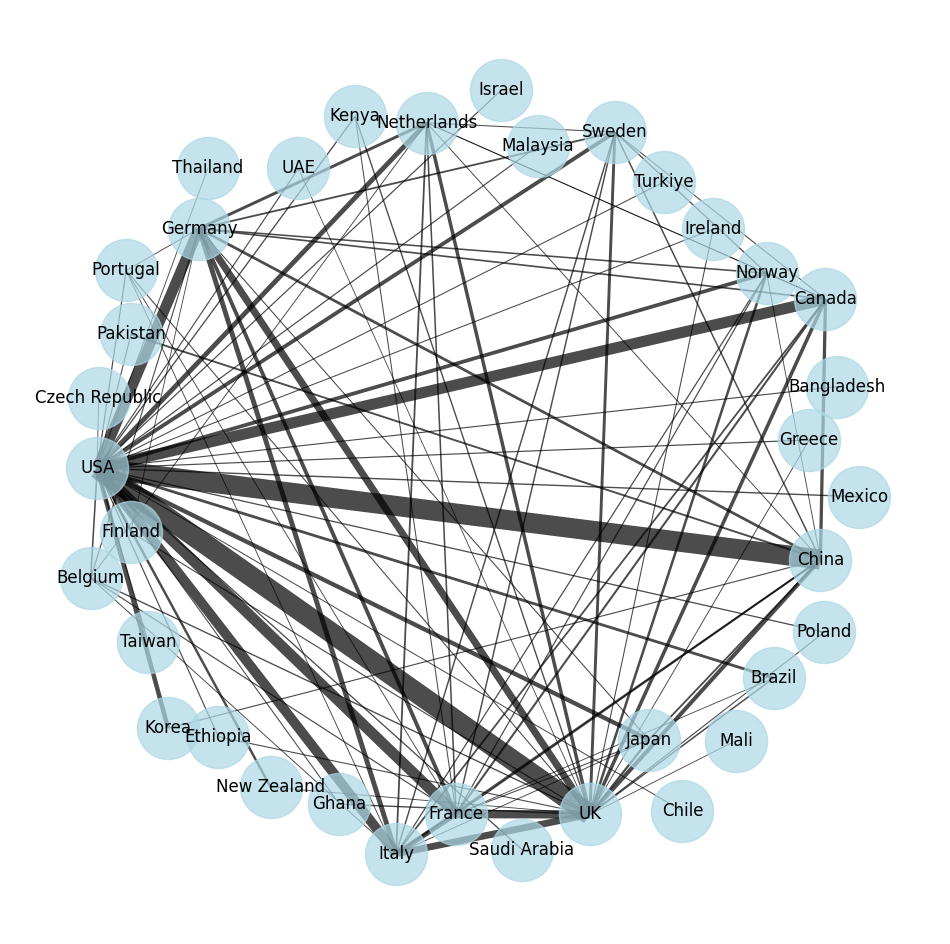

In [163]:
# the top x collaborations
top_collabs = sorted(collaboration_counter.items(), key=lambda x: x[1], reverse=True)[:100]

G_top = nx.Graph()
for (c1, c2), weight in top_collabs:
    G_top.add_edge(c1, c2, weight=weight)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top, k=1000, scale=200, iterations=50, seed=123) 
nx.draw_networkx_nodes(G_top, pos, node_size=2000, node_color='lightblue', alpha = 0.7)
nx.draw_networkx_edges(G_top, pos, width=[d['weight']*0.01 for (u,v,d) in G_top.edges(data=True)], alpha=0.7)
nx.draw_networkx_labels(G_top, pos, font_size=12, font_color='black')
plt.axis('off')
plt.show()


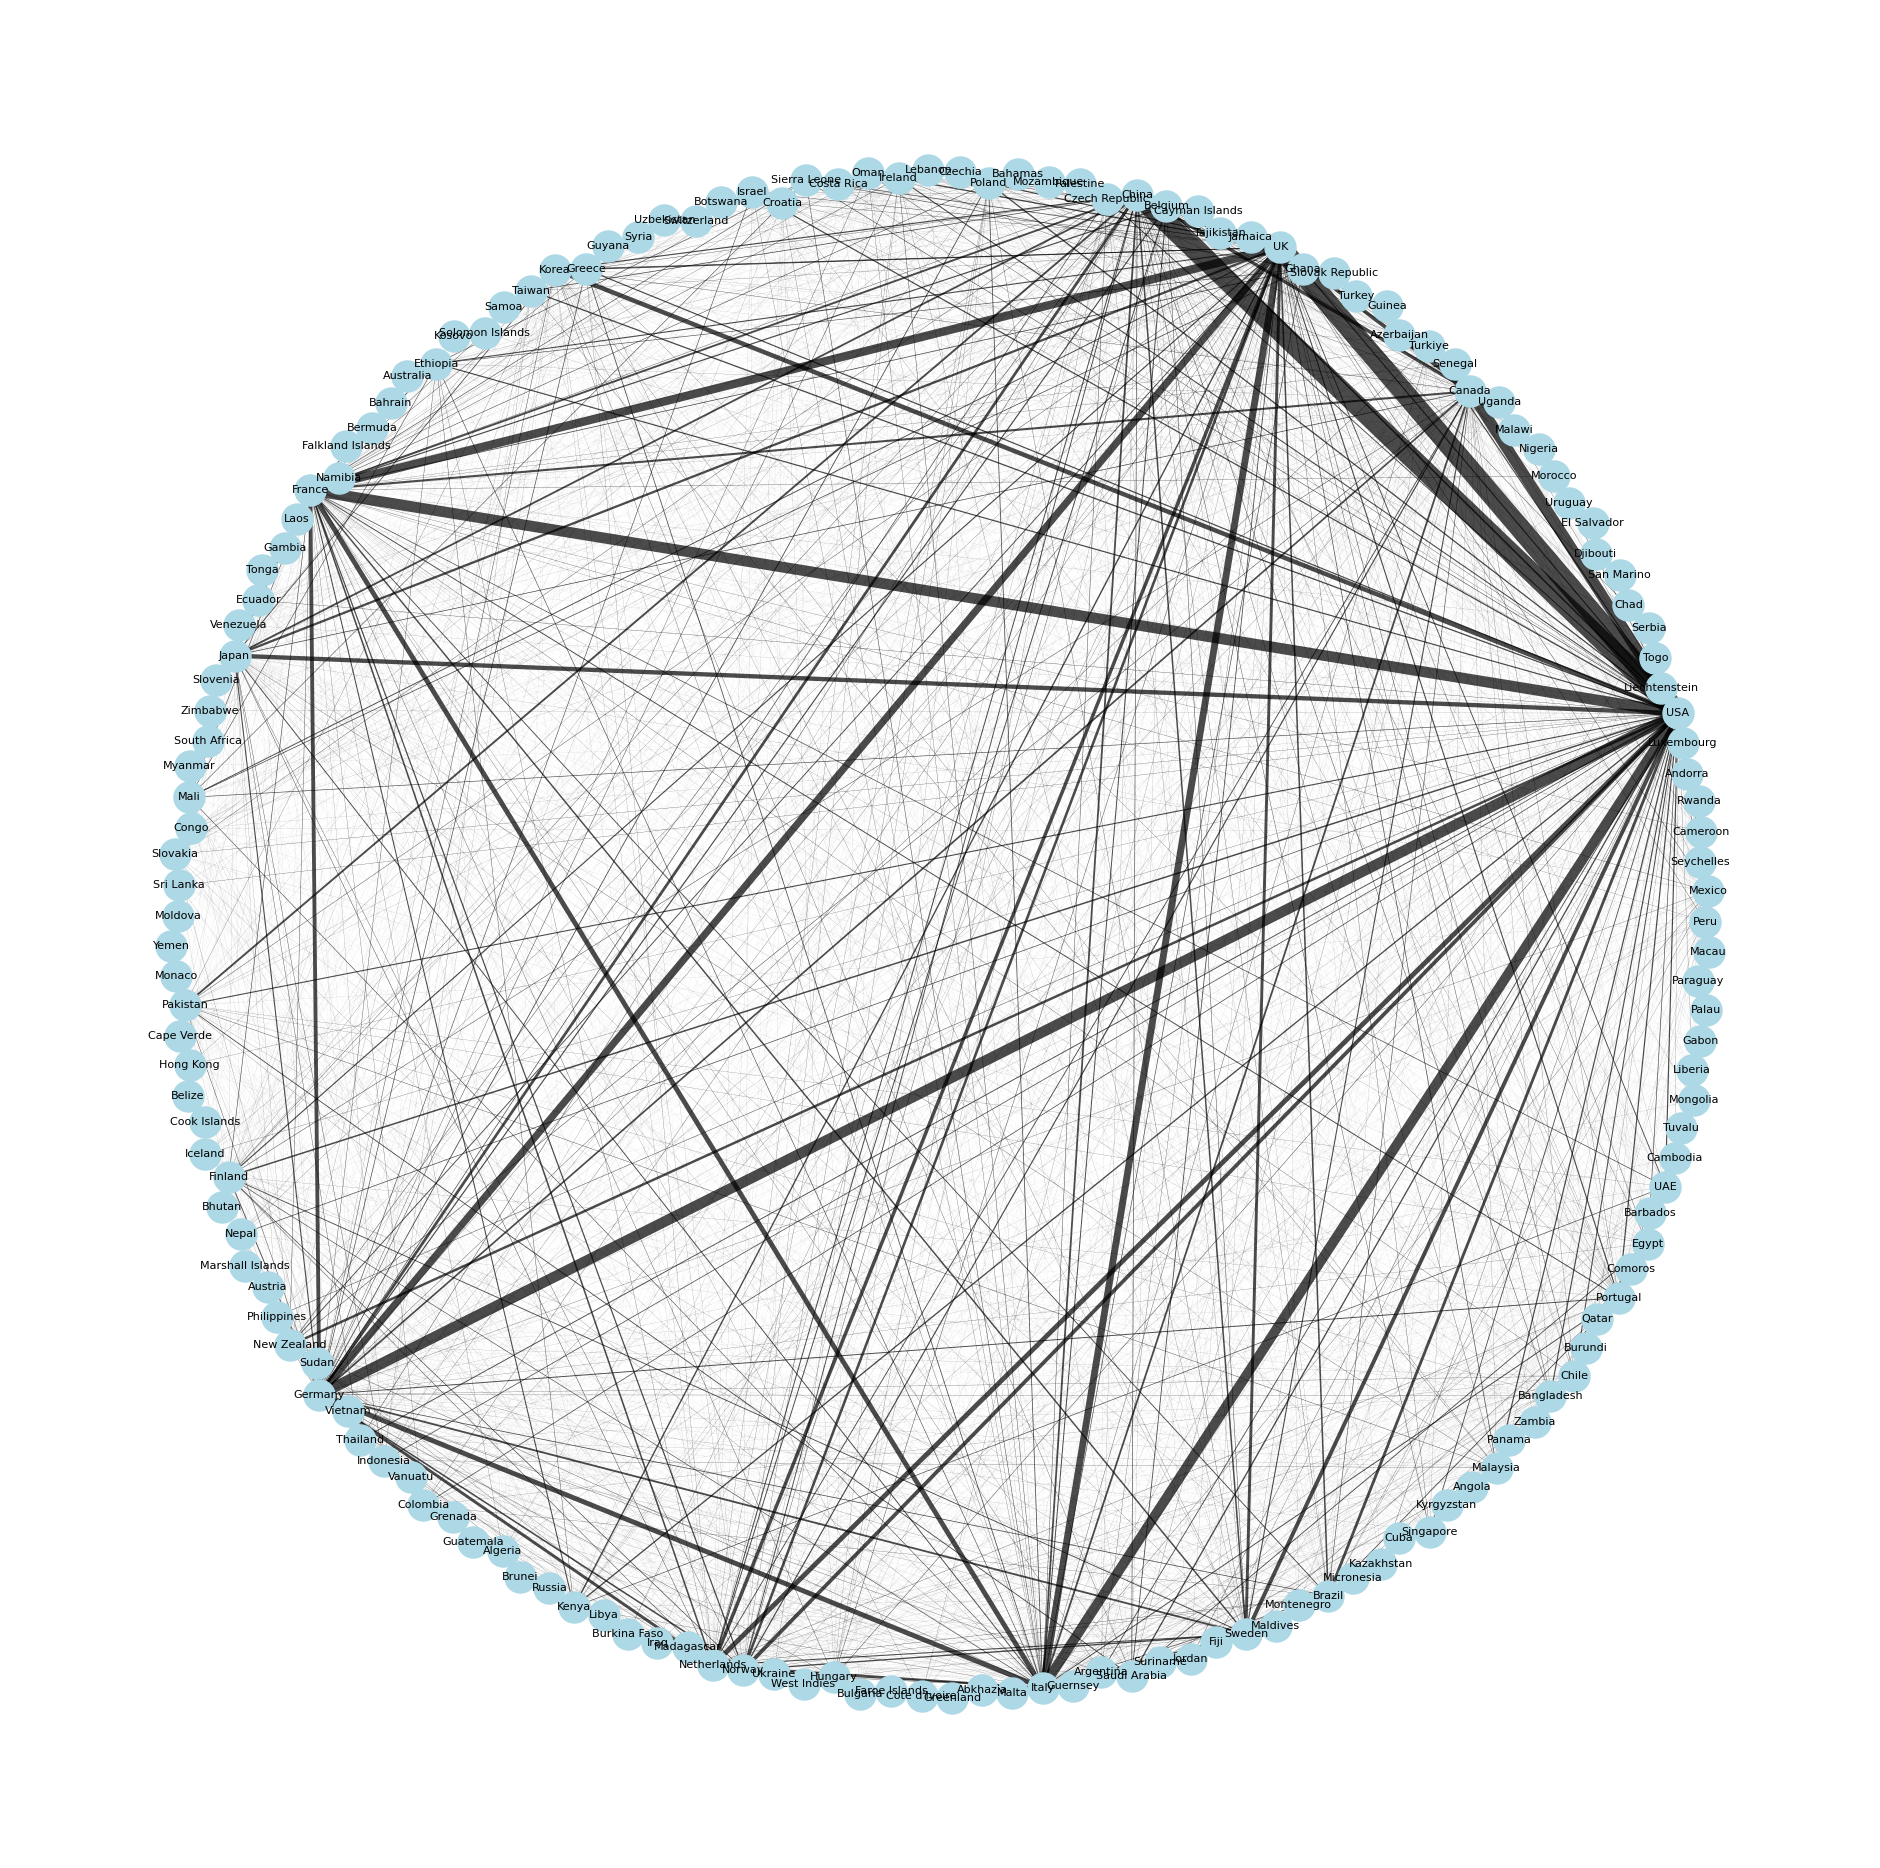

In [149]:
plt.figure(figsize=(24,24))
pos = nx.spring_layout(G, k=10000, iterations=500) 
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*0.01 for (u,v,d) in edges], alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.axis('off')
plt.show()


Text(0, 0.5, 'Count')

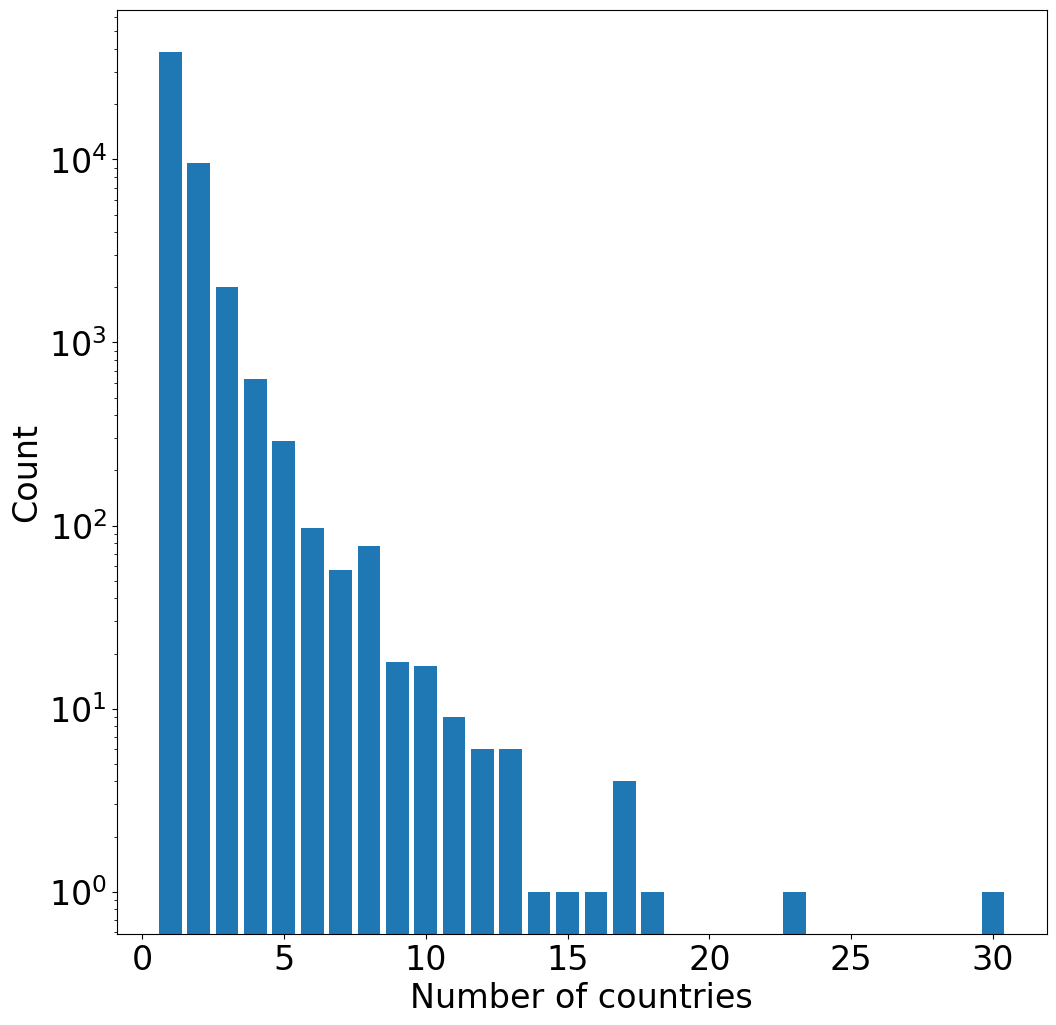

In [184]:
plt.figure(figsize=(12,12))
plt.bar(n_afil.index[1:], n_afil.values[1:])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')
plt.xlabel('Number of countries', fontsize = 24)
plt.ylabel('Count', fontsize = 24)

In [187]:
# Degree centrality 
# Count of edges per node
degree_centrality = nx.degree_centrality(G)
most_connected = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
most_connected

[('USA', 0.89937106918239),
 ('UK', 0.8238993710691824),
 ('Italy', 0.7169811320754718),
 ('Germany', 0.6981132075471699),
 ('France', 0.6855345911949686),
 ('China', 0.6163522012578617),
 ('Netherlands', 0.5723270440251572),
 ('Canada', 0.5534591194968553),
 ('Belgium', 0.5471698113207547),
 ('Brazil', 0.5345911949685535),
 ('Norway', 0.5220125786163522),
 ('Japan', 0.5220125786163522),
 ('Portugal', 0.5094339622641509),
 ('Malaysia', 0.4968553459119497),
 ('Sweden', 0.4716981132075472),
 ('New Zealand', 0.44654088050314467),
 ('Pakistan', 0.4339622641509434),
 ('Ethiopia', 0.4339622641509434),
 ('Korea', 0.41509433962264153),
 ('Ghana', 0.41509433962264153),
 ('Kenya', 0.4088050314465409),
 ('Poland', 0.39622641509433965),
 ('Czech Republic', 0.39622641509433965),
 ('Turkiye', 0.39622641509433965),
 ('Indonesia', 0.389937106918239),
 ('Colombia', 0.3836477987421384),
 ('Chile', 0.37735849056603776),
 ('Saudi Arabia', 0.37106918238993714),
 ('Finland', 0.3647798742138365),
 ('Egypt', 

In [190]:
# Weight (collaboration count)
strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
most_weighted = sorted(strength.items(), key=lambda x: x[1], reverse=True)
most_weighted

[('USA', 10875),
 ('UK', 6669),
 ('France', 3994),
 ('Germany', 3931),
 ('China', 3766),
 ('Italy', 3676),
 ('Canada', 2538),
 ('Netherlands', 1890),
 ('Sweden', 1648),
 ('Norway', 1426),
 ('Japan', 1315),
 ('Belgium', 950),
 ('Brazil', 939),
 ('Korea', 867),
 ('Portugal', 767),
 ('Finland', 719),
 ('Poland', 690),
 ('Ethiopia', 616),
 ('Pakistan', 601),
 ('Saudi Arabia', 600),
 ('New Zealand', 599),
 ('Ghana', 598),
 ('Kenya', 591),
 ('Czech Republic', 539),
 ('Malaysia', 508),
 ('Greece', 497),
 ('Ireland', 447),
 ('Turkiye', 423),
 ('Mali', 397),
 ('Chile', 375),
 ('UAE', 375),
 ('Mexico', 368),
 ('Bangladesh', 350),
 ('Hungary', 340),
 ('Egypt', 334),
 ('Taiwan', 331),
 ('Indonesia', 330),
 ('Thailand', 312),
 ('Sierra Leone', 311),
 ('Israel', 299),
 ('Colombia', 282),
 ('Argentina', 263),
 ('Singapore', 258),
 ('Oman', 250),
 ('Peru', 214),
 ('Croatia', 205),
 ('Serbia', 199),
 ('Nepal', 196),
 ('Uganda', 188),
 ('Slovakia', 181),
 ('Ecuador', 142),
 ('Cameroon', 138),
 ('Morocco

In [192]:
# Betweenness centrality
# How often a node lies on the shortest path between all nodes in a network

betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
most_influential = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
most_influential

[('USA', 0.077913469743268),
 ('France', 0.064621730856598),
 ('UK', 0.05317936698752957),
 ('Japan', 0.04865491650121987),
 ('China', 0.04133462069399908),
 ('New Zealand', 0.03683121489414616),
 ('Brazil', 0.03524651746908536),
 ('Germany', 0.035003816776081685),
 ('Italy', 0.03364901253429253),
 ('Norway', 0.03129223887911724),
 ('Portugal', 0.024436159740455737),
 ('Korea', 0.02374492057438962),
 ('Netherlands', 0.023558265755078786),
 ('Belgium', 0.02238534459155248),
 ('Sweden', 0.01986605034621183),
 ('Czechia', 0.018997286922233146),
 ('Suriname', 0.018330865422633597),
 ('Malaysia', 0.01752306689814917),
 ('Pakistan', 0.017126013549695437),
 ('Fiji', 0.016674651020957172),
 ('Liberia', 0.01639458528885998),
 ('Turkiye', 0.01578810012363345),
 ('Ethiopia', 0.014679040230922924),
 ('Ghana', 0.014475719601727539),
 ('Mali', 0.013915500179698392),
 ('Colombia', 0.013868252880136073),
 ('Singapore', 0.013661933788211213),
 ('Indonesia', 0.013482837084048321),
 ('Morocco', 0.0134804

In [194]:
# Closeness centrality
# How close a node is to all other nodes in a graph

closeness_centrality = nx.closeness_centrality(G)
most_accessible = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
most_accessible


[('USA', 0.9085714285714286),
 ('UK', 0.8502673796791443),
 ('Italy', 0.7794117647058824),
 ('Germany', 0.7681159420289855),
 ('France', 0.7607655502392344),
 ('China', 0.7227272727272728),
 ('Netherlands', 0.7004405286343612),
 ('Canada', 0.691304347826087),
 ('Belgium', 0.6883116883116883),
 ('Brazil', 0.6824034334763949),
 ('Norway', 0.676595744680851),
 ('Japan', 0.676595744680851),
 ('Portugal', 0.6708860759493671),
 ('Malaysia', 0.6652719665271967),
 ('Sweden', 0.654320987654321),
 ('New Zealand', 0.6437246963562753),
 ('Pakistan', 0.6385542168674698),
 ('Ethiopia', 0.6385542168674698),
 ('Korea', 0.6309523809523809),
 ('Ghana', 0.6309523809523809),
 ('Kenya', 0.6284584980237155),
 ('Poland', 0.6235294117647059),
 ('Czech Republic', 0.6235294117647059),
 ('Turkiye', 0.6235294117647059),
 ('Indonesia', 0.62109375),
 ('Colombia', 0.6186770428015564),
 ('Chile', 0.6162790697674418),
 ('Saudi Arabia', 0.6138996138996139),
 ('Finland', 0.6115384615384616),
 ('Egypt', 0.606870229007633

In [196]:
# Eigenvector centrality
# Measure of influence based on influence of neighbors

eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
most_influential_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True) 
most_influential_eigen

[('USA', 0.5817264907360459),
 ('UK', 0.43360196459534345),
 ('China', 0.32715610728791267),
 ('France', 0.2801950122504885),
 ('Germany', 0.27634704620717665),
 ('Italy', 0.260974322666592),
 ('Canada', 0.21812910640826355),
 ('Netherlands', 0.13637983977984083),
 ('Sweden', 0.11689359386021017),
 ('Norway', 0.10492405493238324),
 ('Japan', 0.10378258354723979),
 ('Korea', 0.07561036693455753),
 ('Brazil', 0.06519987425857372),
 ('Belgium', 0.05871246238143151),
 ('New Zealand', 0.04945812954607229),
 ('Finland', 0.048091127181058096),
 ('Portugal', 0.04494197190379278),
 ('Poland', 0.0422584076349707),
 ('Kenya', 0.03876813891064385),
 ('Ghana', 0.036000412742147284),
 ('Ethiopia', 0.03597546901570086),
 ('Greece', 0.03539632790698137),
 ('Pakistan', 0.03524753038149638),
 ('Ireland', 0.03301641793816843),
 ('Saudi Arabia', 0.03254832371540674),
 ('Czech Republic', 0.029471540965128804),
 ('UAE', 0.02827792729655362),
 ('Mexico', 0.027610929185759213),
 ('Malaysia', 0.027048006388682

In [202]:
# Community detection
cliques = list(nx.find_cliques(G))
print(cliques)

# clustering coefficient
# Likelihood that neighbors are connected
clustering = nx.clustering(G)
most_clustered = sorted(clustering.items(), key=lambda x: x[1], reverse=True) 
most_clustered

[['Moldova', 'Oman', 'Germany'], ['Yemen', 'China'], ['Chad', 'Kenya', 'UK', 'Togo', 'Cameroon'], ['Chad', 'Kenya', 'UK', 'Togo', "Cote d'Ivoire"], ['Chad', 'Kenya', 'UK', 'Italy', 'Cameroon'], ['Chad', 'Kenya', 'UK', 'Italy', "Cote d'Ivoire"], ['Tajikistan', 'Germany', 'Norway'], ['Tajikistan', 'Germany', 'Kyrgyzstan'], ['San Marino', 'Italy', 'Brazil'], ['Montenegro', 'Italy', 'Belgium', 'Croatia', 'Sweden', 'UK', 'Germany', 'Greece', 'Serbia', 'Portugal', 'Turkiye', 'France', 'Hungary', 'Bulgaria'], ['Grenada', 'Italy', 'China', 'Tonga', 'UK', 'Canada', 'Fiji', 'Germany', 'Serbia'], ['Angola', 'France'], ['Djibouti', 'France'], ['Slovenia', 'Germany', 'Austria', 'Japan'], ['Macau', 'China'], ['Palestine', 'Malaysia', 'UK', 'Germany', 'Jordan', 'Iraq', 'Qatar'], ['Palestine', 'Malaysia', 'UK', 'Germany', 'Jordan', 'Iraq', 'Egypt'], ['Palestine', 'Malaysia', 'UK', 'Germany', 'Jordan', 'Belgium', 'UAE', 'New Zealand', 'Turkiye', 'Egypt'], ['Palestine', 'Malaysia', 'UK', 'Germany', 'Jor

[('Cape Verde', 1.0),
 ('Vietnam', 1.0),
 ('Montenegro', 1.0),
 ('South Africa', 1.0),
 ('Vanuatu', 1.0),
 ('Nigeria', 1.0),
 ('Monaco', 1.0),
 ('Seychelles', 1.0),
 ('Slovak Republic', 1.0),
 ('Bermuda', 1.0),
 ('Paraguay', 1.0),
 ('Australia', 1.0),
 ('San Marino', 1.0),
 ('Bhutan', 1.0),
 ('Grenada', 1.0),
 ('Tuvalu', 1.0),
 ('Moldova', 1.0),
 ('Guernsey', 1.0),
 ('Suriname', 1.0),
 ('Turkey', 1.0),
 ('Falkland Islands', 1.0),
 ('Slovenia', 1.0),
 ('Maldives', 1.0),
 ('Palau', 1.0),
 ('Andorra', 0.9869281045751634),
 ('El Salvador', 0.9746376811594203),
 ('Guatemala', 0.9566666666666667),
 ('Luxembourg', 0.9545454545454546),
 ('Ukraine', 0.9525691699604744),
 ('Faroe Islands', 0.9444444444444444),
 ('Sudan', 0.9373219373219374),
 ('Azerbaijan', 0.9311594202898551),
 ('Switzerland', 0.9281045751633987),
 ('Greenland', 0.9242424242424242),
 ('Czechia', 0.9239130434782609),
 ('Madagascar', 0.9230769230769231),
 ('Hong Kong', 0.9202898550724637),
 ('Guyana', 0.9128787878787878),
 ('Syri